## Importing libraries and data 

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [12]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [13]:
# Create project folder path
path=r'C:\Users\Bori\Documents\Careerfoundry\Happiness\01 Data'

In [14]:
# Import data

df = pd.read_csv(os.path.join(path, 'Prepared Data', 'happiness_income_flags.csv'))

## Data cleaning and wrangling

In [15]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Country,Happiness Rank,Happiness Score,GDP per capita,Social support,Health (Life Expectancy),Freedom,Perceptions of corruption,Generosity,Year,Income category
0,0,0.0,Switzerland,1.0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015.0,Middle income
1,1,1.0,Iceland,2.0,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015.0,Middle income
2,2,2.0,Denmark,3.0,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015.0,Middle income
3,3,3.0,Norway,4.0,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015.0,Middle income
4,4,4.0,Canada,5.0,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015.0,Middle income


In [16]:
df = df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'])

In [17]:
# Check the column names 

df.columns

Index(['Country', 'Happiness Rank', 'Happiness Score', 'GDP per capita',
       'Social support', 'Health (Life Expectancy)', 'Freedom',
       'Perceptions of corruption', 'Generosity', 'Year', 'Income category'],
      dtype='object')

In [35]:
# Create a subset which contains only the 'Happiness_Score' and indicators

sub = df[['GDP per capita', 'Social support', 'Health (Life Expectancy)', 'Freedom', 'Perceptions of corruption', 'Generosity']]

In [36]:
#Checking for missing values
sub.isnull().sum()

GDP per capita               2
Social support               2
Health (Life Expectancy)     3
Freedom                      2
Perceptions of corruption    3
Generosity                   2
dtype: int64

In [37]:
# Check the missing values

sub[sub['Health (Life Expectancy)'].isna()]

,GDP per capita,Social support,Health (Life Expectancy),Freedom,Perceptions of corruption,Generosity
385,NaN,NaN,NaN,NaN,NaN,NaN
1208,NaN,NaN,NaN,NaN,NaN,NaN
1328,1.144,1.309,NaN,0.416,0.067,0.065


In [38]:
sub.shape

(1367, 6)

In [46]:
sub = sub.dropna()  

In [47]:
sub.shape

(1363, 6)

In [48]:
#Checking for missing values
sub.isnull().sum()

GDP per capita               0
Social support               0
Health (Life Expectancy)     0
Freedom                      0
Perceptions of corruption    0
Generosity                   0
dtype: int64

## The elbow technique

In [49]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [50]:
score = [kmeans[i].fit(sub).score(sub) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\Bori\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bori\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bori\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bori\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

[-579.14963426238,
 -309.6721595045666,
 -243.86479302051592,
 -209.8535450893354,
 -186.97234654080273,
 -166.88257905301555,
 -153.0994875111465,
 -142.7958016444318,
 -134.17974507550036]

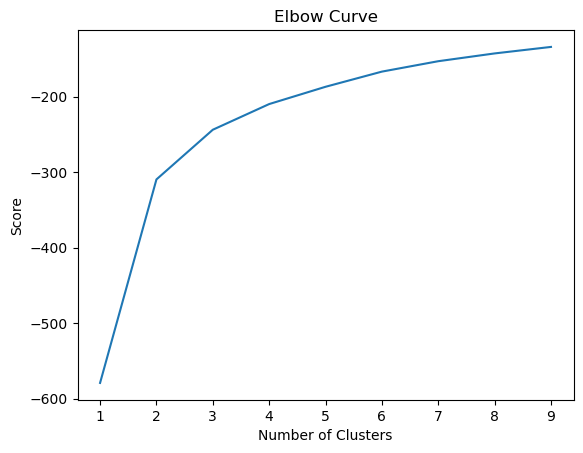

In [52]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In this example, there's a large jump from two to three on the x-axis, but after that, the curve straightens out. This means that the optimal count for your clusters is three.

## k-means clustering¶

In [57]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [58]:
# Fit the k-means object to the data.

kmeans.fit(sub)

C:\Users\Bori\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [59]:
sub['clusters'] = kmeans.fit_predict(sub)

C:\Users\Bori\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [60]:
sub.head()

,GDP per capita,Social support,Health (Life Expectancy),Freedom,Perceptions of corruption,Generosity,clusters
0,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,0
1,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,0
2,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,0
3,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,0
4,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,0


In [61]:
sub['clusters'].value_counts()

clusters
2    571
0    421
1    371
Name: count, dtype: int64

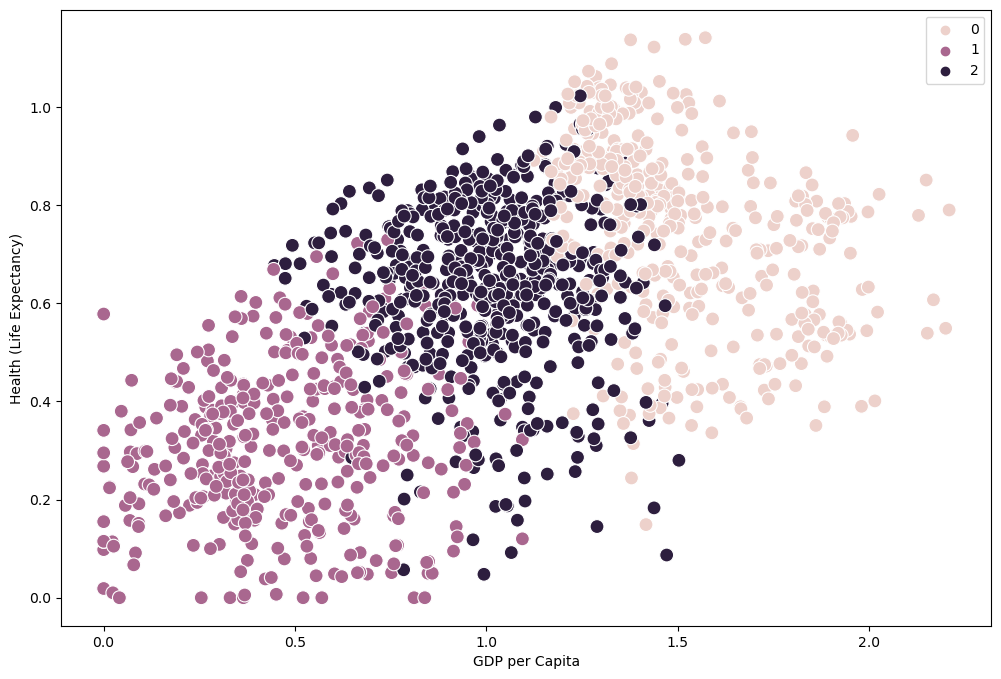

In [62]:
# Plot the clusters for the "Happiness_Score" and "GDP_per_Capita" variables

plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = sub['GDP per capita'], y = sub['Health (Life Expectancy)'], hue = kmeans.labels_, s = 100) 

ax.grid(False)
plt.xlabel('GDP per Capita')
plt.ylabel('Health (Life Expectancy)')
plt.show()

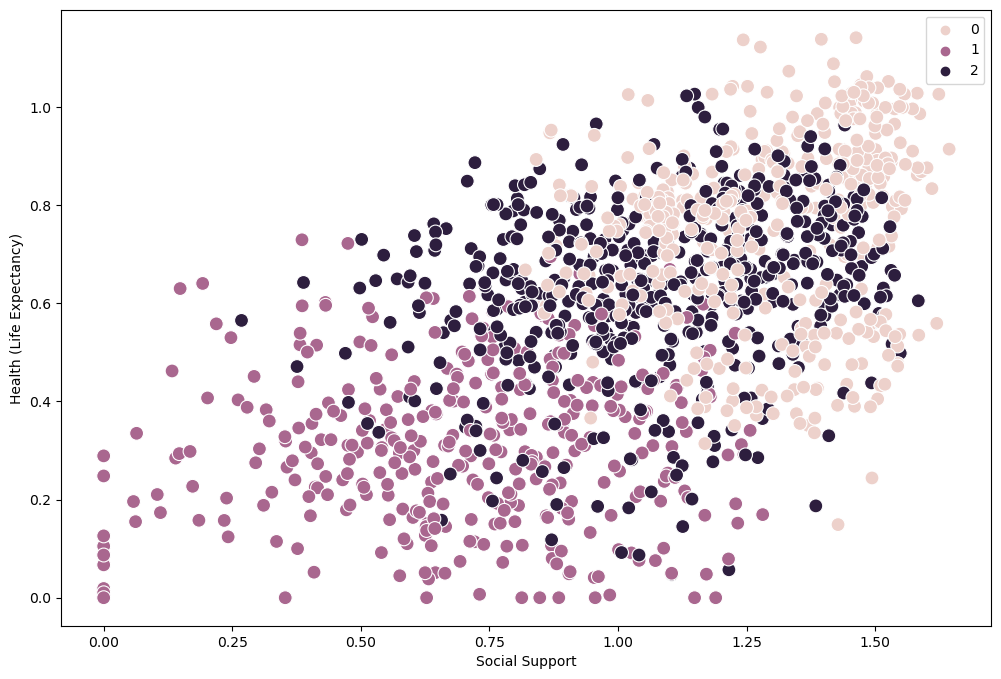

In [63]:
# Plot the clusters for the "Happiness_Score" and "Social support" variables

plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = sub['Social support'], y = sub['Health (Life Expectancy)'], hue = kmeans.labels_, s = 100) 

ax.grid(False)
plt.xlabel('Social Support')
plt.ylabel('Health (Life Expectancy)')
plt.show()

**Conclusions**

The findings suggest that the pink cluster generally has the highest levels of GDP per capita, social support, and health (life expectancy), followed by the dark cluster,while the purple cluster tends to have lower levels on these indicators. These clusters represent different levels of economic development and well-being, with the pink cluster being the most prosperous and happy, and the purple cluster being the least.

## Descriptive statistics

In [64]:
sub.loc[sub['clusters'] == 2, 'cluster'] = 'dark'
sub.loc[sub['clusters'] == 1, 'cluster'] = 'purple'
sub.loc[sub['clusters'] == 0, 'cluster'] = 'pink'

In [67]:
sub.groupby('cluster').agg({'GDP per capita':['mean', 'median'], 
                         'Social support':['mean', 'median'], 
                         'Health (Life Expectancy)':['mean', 'median']})

GDP per capita           Social support            \
                  mean    median           mean    median   
cluster                                                     
dark          1.012983  1.023890       1.081130  1.098178   
pink          1.508942  1.448000       1.291232  1.315324   
purple        0.468481  0.454939       0.711332  0.735132   

        Health (Life Expectancy)           
                            mean   median  
cluster                                    
dark                    0.636719  0.64718  
pink                    0.754122  0.78800  
purple                  0.309814  0.30800

**Conclusions** 
Based on these statistics, it appears that the Purple Cluster is the most consistent overall, as it generally has the smallest differences between the mean and median values across all indicators. The Dark Cluster exhibits slightly larger differences, indicating slightly more variability within those clusters for some indicators. The Pink Cluster is the most diverse and inconsistent.

**What could these results be useful for?**
The inconsistency within clusters can be used for anomaly detection. If some data points within a cluster significantly deviate from the cluster's mean or median, it could signal unusual cases that require further investigation. This can prompt additional analysis and new hypothesis The findings can help better understand the characteristics of each cluster. Within the realm social or public policy, understanding cluster's differences can inform targeted investitions, interventions, or support efforts. In the context of business and marketing, organizations can use these results to make critical decisions concerning company expansion, product development, and resource allocation. These clusters can help to monitor changes over time. This can enable to compare whether countries or regions within each cluster improves or deterioratates in key areas such as health, family support, economic conditions, or overall happiness.

In general the results of cluster analysis can be a foundation for a wide range of applications and decision-making processes in various domains, including business, marketing, public policy, healthcare.

In [68]:
# Export the dataframe to csv file

sub.to_csv(os.path.join(path, 'Prepared Data', 'clusters.csv'))